<a href="https://colab.research.google.com/github/sh33ba/Self-Driving-Car-Prototype-with-Basic-Approach/blob/master/self_driving_car_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#image augmentation
from imgaug import augmenters as iaa

import pandas as pd
import random
import cv2

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datadir="/content/drive/My Drive/Colab Notebooks/Self Driving Car/trained_data"

In [0]:
column=['center','left','right','steering','throttle','reverse','speed']
data=pd.read_csv(os.path.join(datadir,'driving_log.csv'), names=column)

In [9]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,D:\Git\GIthub\Self Driving Car\trained_data\IM...,D:\Git\GIthub\Self Driving Car\trained_data\I...,D:\Git\GIthub\Self Driving Car\trained_data\I...,0.0,0.0,0,0.000079
1,D:\Git\GIthub\Self Driving Car\trained_data\IM...,D:\Git\GIthub\Self Driving Car\trained_data\I...,D:\Git\GIthub\Self Driving Car\trained_data\I...,0.0,0.0,0,0.000081
2,D:\Git\GIthub\Self Driving Car\trained_data\IM...,D:\Git\GIthub\Self Driving Car\trained_data\I...,D:\Git\GIthub\Self Driving Car\trained_data\I...,0.0,0.0,0,0.000084
3,D:\Git\GIthub\Self Driving Car\trained_data\IM...,D:\Git\GIthub\Self Driving Car\trained_data\I...,D:\Git\GIthub\Self Driving Car\trained_data\I...,0.0,0.0,0,0.000080
4,D:\Git\GIthub\Self Driving Car\trained_data\IM...,D:\Git\GIthub\Self Driving Car\trained_data\I...,D:\Git\GIthub\Self Driving Car\trained_data\I...,0.0,0.0,0,0.000079


In [0]:
df=data.iloc[:,[0,3]]

In [11]:
df.head()

,center,steering
0,D:\Git\GIthub\Self Driving Car\trained_data\IM...,0.0
1,D:\Git\GIthub\Self Driving Car\trained_data\IM...,0.0
2,D:\Git\GIthub\Self Driving Car\trained_data\IM...,0.0
3,D:\Git\GIthub\Self Driving Car\trained_data\IM...,0.0
4,D:\Git\GIthub\Self Driving Car\trained_data\IM...,0.0


In [12]:
df.center=df.center.apply(lambda x: x.split('\\')[-1])

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [13]:
df.head()

,center,steering
0,center_2019_07_31_01_18_28_579.jpg,0.0
1,center_2019_07_31_01_18_28_680.jpg,0.0
2,center_2019_07_31_01_18_28_789.jpg,0.0
3,center_2019_07_31_01_18_28_900.jpg,0.0
4,center_2019_07_31_01_18_29_015.jpg,0.0


In [14]:
df.count()

center      5696
steering    5696
dtype: int64

In [0]:
num_bins=25
hist,bins=np.histogram(df['steering'],num_bins)

In [16]:
bins

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [17]:
bins[:-1]

array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
       -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
        0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92])

In [18]:
bins[1:]

array([-0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36, -0.28,
       -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,  0.44,
        0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ])

In [19]:
(bins[:-1]+bins[1:])/2

array([-0.96, -0.88, -0.8 , -0.72, -0.64, -0.56, -0.48, -0.4 , -0.32,
       -0.24, -0.16, -0.08,  0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,
        0.48,  0.56,  0.64,  0.72,  0.8 ,  0.88,  0.96])

In [0]:
center=(bins[:-1]+bins[1:])*0.5

In [21]:
print(hist)

[  46   13   12   23  107   47   45  111  360   85   62  176 4128   66
   25   24  129   54   20   14   58   24    4    5   58]


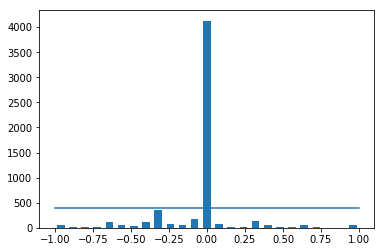

In [22]:
samples_per_bin=400
plt.bar(center,hist,width=0.05)
plt.plot((np.min(df['steering']),np.max(df['steering'])),(samples_per_bin,samples_per_bin))

In [23]:
df.count()

center      5696
steering    5696
dtype: int64

[  46   13   12   23  107   47   45  111  360   85   62  176 4128   66
   25   24  129   54   20   14   58   24    4    5   58]


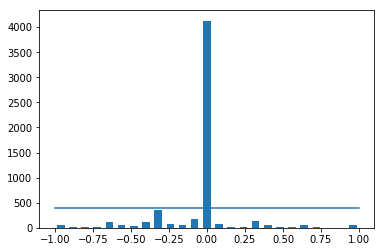

In [24]:
hist, _ =np.histogram(df['steering'],num_bins)
plt.bar(center,hist,width=0.05)
print(hist)
plt.plot((np.min(df['steering']),np.max(df['steering'])),(samples_per_bin,samples_per_bin))


total data: 5696
removed: 3728
remaining: 1968
[ 46  13  12  23 107  47  45 111 360  85  62 176 400  66  25  24 129  54
  20  14  58  24   4   5  58]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


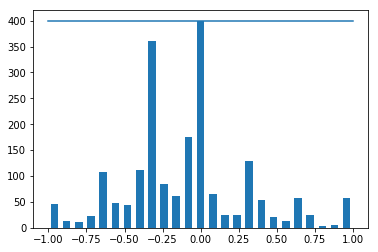

In [25]:
#alternative to above method
#plot upto 300 in y axis


print('total data:', len(df))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(df['steering'])):
    if df['steering'][i] >= bins[j] and df['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
df.drop(df.index[remove_list], inplace=True)
print('remaining:', len(df))


#calculating the histogarm for new plot
hist, _ = np.histogram(df['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
print(hist)
plt.plot((np.min(df['steering']), np.max(df['steering'])), (samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(base_dir,dataframe):
  image_paths=[]
  steering_angle=[]
  #taking dataframe values as numpy array
  center=dataframe.iloc[:,0].values
  angle=dataframe.iloc[:,1].values
  
  #itretting the loop over the whole numpy array
  for i in range(len(dataframe)):
    image_paths.append(os.path.join(base_dir,center[i]))
    steering_angle.append(angle[i])
    
  #returning the list as numpy array
  image_p=np.array(image_paths)
  angle_p=np.array(steering_angle)
  return image_p, angle_p

In [0]:
image_paths, steerings=load_img_steering('/content/drive/My Drive/Colab Notebooks/Self Driving Car/trained_data/IMG',df)

In [28]:
image_paths[0]

'/content/drive/My Drive/Colab Notebooks/Self Driving Car/trained_data/IMG/center_2019_07_31_01_18_29_015.jpg'

In [29]:
len(image_paths)

1968

In [30]:
steerings[0]

0.0

In [31]:
len(steerings)

1968

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(image_paths,steerings,test_size=0.2, random_state=21)
print('Training Samples: {}\nValid Samples: {}'.format(len(x_train),len(x_valid)))

Training Samples: 1574
Valid Samples: 394


Text(0.5, 1.0, 'Zoomed Image')

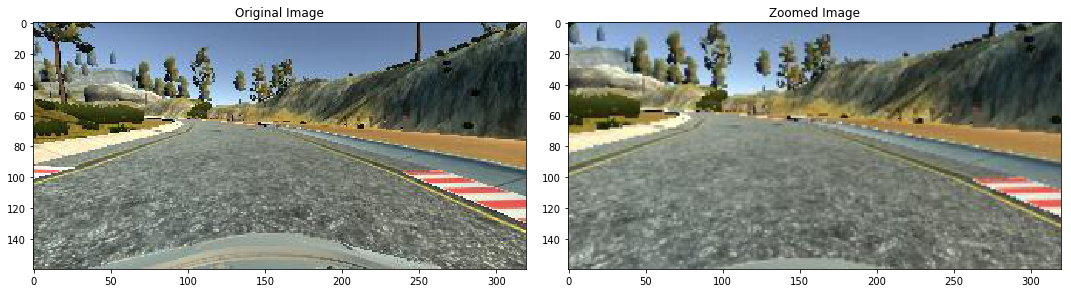

In [33]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


#image selection
image = image_paths[random.randint(0, 100)]
original_image = mpimg.imread(image)


#function aplied
zoomed_image = zoom(original_image)


#ploting both image in one canvas
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Brightness altered image ')

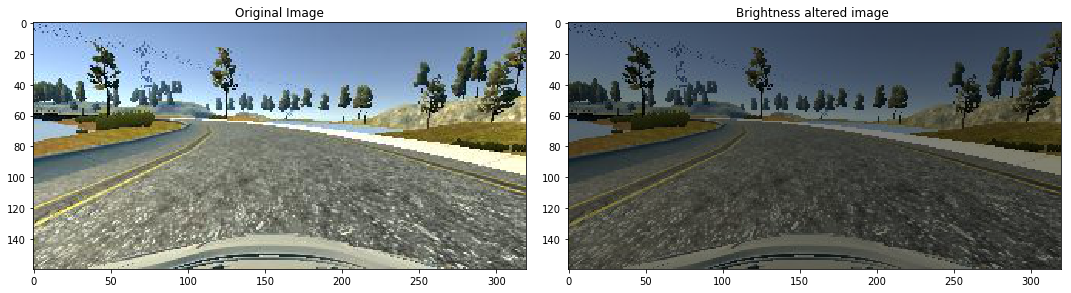

In [34]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
  
  
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.129927')

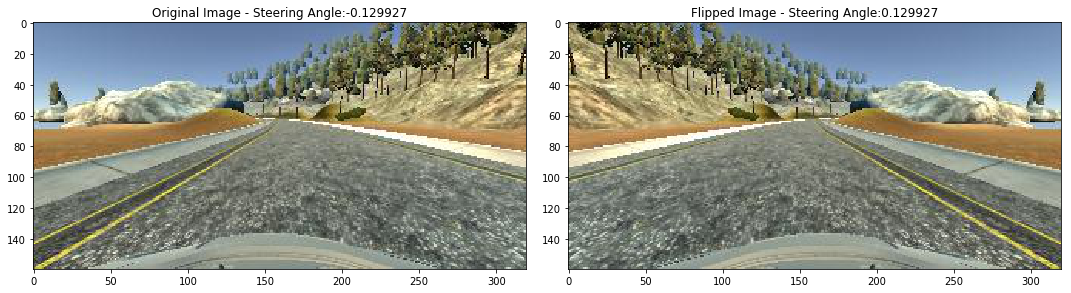

In [35]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
  
  
  
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [0]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)
    
    return image, steering_angle

In [0]:
def img_preprocess(img):
    img = img[60:135,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

In [0]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)


Text(0.5, 1.0, 'Preprocessed Image')

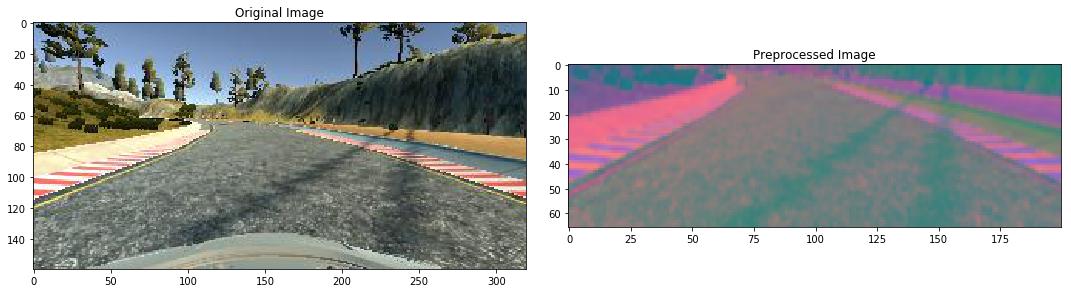

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')


In [0]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield (np.asarray(batch_img), np.asarray(batch_steering))





In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Conv2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Conv2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Conv2D(64, 3, 3, activation='elu'))
  
  model.add(Conv2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
  return model

In [42]:
model = nvidia_model()
print(model.summary())



history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)


W0731 16:19:18.352116 140117401982848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
W0731 16:19:18.390050 140117401982848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 16:19:18.397837 140117401982848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               115300    
__________

W0731 16:19:18.925679 140117401982848 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/5
300/300 [==============================] - 850s 3s/step - loss: 0.1248 - acc: 0.2094 - val_loss: 0.1024 - val_acc: 0.1946
Epoch 2/5
300/300 [==============================] - 251s 837ms/step - loss: 0.0959 - acc: 0.2090 - val_loss: 0.0878 - val_acc: 0.1970
Epoch 3/5
300/300 [==============================] - 249s 830ms/step - loss: 0.0831 - acc: 0.2180 - val_loss: 0.0832 - val_acc: 0.1881
Epoch 4/5
300/300 [==============================] - 247s 825ms/step - loss: 0.0782 - acc: 0.2197 - val_loss: 0.0848 - val_acc: 0.1919
Epoch 5/5
300/300 [==============================] - 247s 825ms/step - loss: 0.0757 - acc: 0.2173 - val_loss: 0.0904 - val_acc: 0.1934


In [0]:
model.save('sdc_model.h5')

In [0]:
from google.colab import files
files.download("sdc_model.h5")